# Evaluate Model

## Setup environment

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os, tempfile

mpl.rcParams['figure.figsize'] = (10, 5)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Sample Images

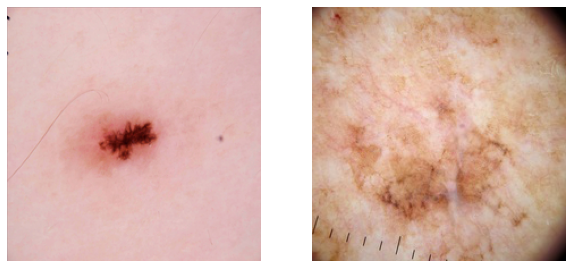

In [30]:
from PIL import Image

fig, ax = plt.subplots(1, 2)
np.vectorize(lambda ax:ax.axis('off'))(ax)

benign = Image.open('./data_kaggle_test/benign/1.jpg')
malignant = Image.open('./data_kaggle_test/malignant/1.jpg')

ax[0].imshow(benign)
ax[1].imshow(malignant)

## Load Trained Models

In [31]:
from keras.models import load_model

baseline = load_model('./models/baseline.h5')
weighted = load_model('./models/weighted.h5')
transfer = load_model('./models/transfer.h5')

## Layer Inspection

In [4]:
from keras.models import Model
import math

def plot_filters(model, filters, image):
    #
    outputs = [model.layers[x].output for x in filters]
    modelf= Model(inputs= model.input, outputs= outputs)
    features_map= modelf.predict(np.reshape(image,(1,224,224,3)))
    # for one single filter add fourth dimension
    if(len(features_map)==1):
        features_map=features_map[None,:]
    #
    for name, feature_map in enumerate(features_map):
        square = math.ceil(np.sqrt(feature_map.shape[-1]))
        # plot image w/o pad
        fig, ax = plt.subplots(square, square, figsize=(120,120))
        fig.subplots_adjust(wspace=0, hspace= 0, left= 0, right= 0.1, top= 0.1, bottom= 0)
        np.vectorize(lambda ax:ax.axis('off'))(ax)
        # show square image
        for idx in range(feature_map.shape[-1]):
            ax[idx//square,idx%square].imshow(feature_map[0,:,:,idx])
            if(idx == 0):
                ax[0,0].set_title('{}: {}'.format(outputs[name].name,feature_map.shape), loc='left')

### Baseline Model

In [5]:
for idx, layer in enumerate(baseline.layers):
    print('Layer {}: name= {:15} in= {} out= {}'.format(idx, layer.name, layer.input.shape, layer.output.shape))

Layer 0: name= conv2d          in= (None, 224, 224, 3) out= (None, 222, 222, 32)
Layer 1: name= max_pooling2d   in= (None, 222, 222, 32) out= (None, 111, 111, 32)
Layer 2: name= conv2d_1        in= (None, 111, 111, 32) out= (None, 109, 109, 32)
Layer 3: name= max_pooling2d_1 in= (None, 109, 109, 32) out= (None, 54, 54, 32)
Layer 4: name= conv2d_2        in= (None, 54, 54, 32) out= (None, 52, 52, 64)
Layer 5: name= max_pooling2d_2 in= (None, 52, 52, 64) out= (None, 26, 26, 64)
Layer 6: name= flatten         in= (None, 26, 26, 64) out= (None, 43264)
Layer 7: name= dense           in= (None, 43264) out= (None, 64)
Layer 8: name= dropout         in= (None, 64) out= (None, 64)
Layer 9: name= dense_1         in= (None, 64) out= (None, 1)


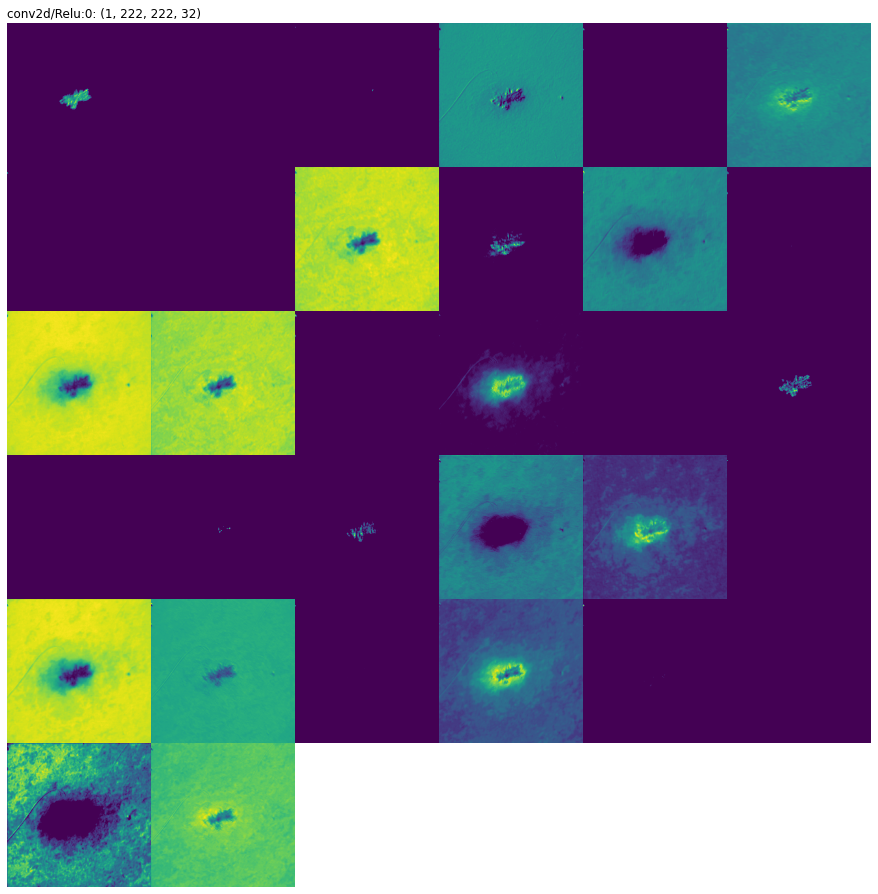

In [6]:
# plot features within features
plot_filters(baseline, [0], benign)

### Weighted Model

In [7]:
for idx, layer in enumerate(weighted.layers):
    print('Layer {}: name= {:15} in= {} out= {}'.format(idx, layer.name, layer.input.shape, layer.output.shape))

Layer 0: name= conv2d_9        in= (None, 224, 224, 3) out= (None, 222, 222, 32)
Layer 1: name= max_pooling2d_9 in= (None, 222, 222, 32) out= (None, 111, 111, 32)
Layer 2: name= conv2d_10       in= (None, 111, 111, 32) out= (None, 109, 109, 32)
Layer 3: name= max_pooling2d_10 in= (None, 109, 109, 32) out= (None, 54, 54, 32)
Layer 4: name= conv2d_11       in= (None, 54, 54, 32) out= (None, 52, 52, 64)
Layer 5: name= max_pooling2d_11 in= (None, 52, 52, 64) out= (None, 26, 26, 64)
Layer 6: name= flatten_3       in= (None, 26, 26, 64) out= (None, 43264)
Layer 7: name= dense_6         in= (None, 43264) out= (None, 64)
Layer 8: name= dropout_3       in= (None, 64) out= (None, 64)
Layer 9: name= dense_7         in= (None, 64) out= (None, 1)


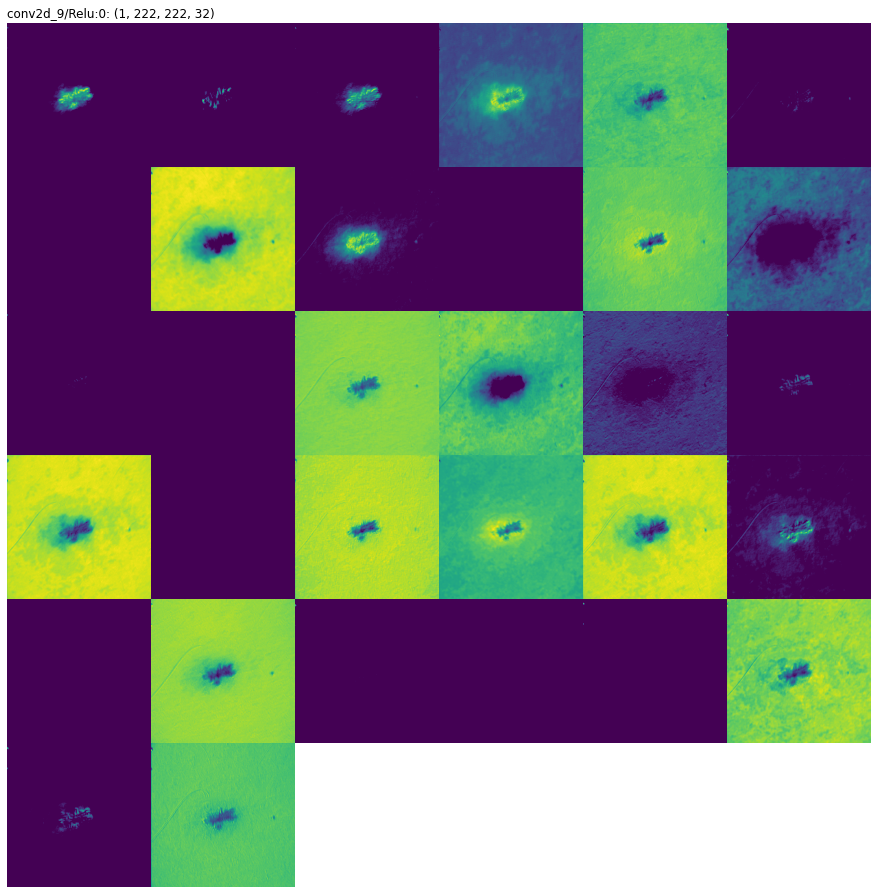

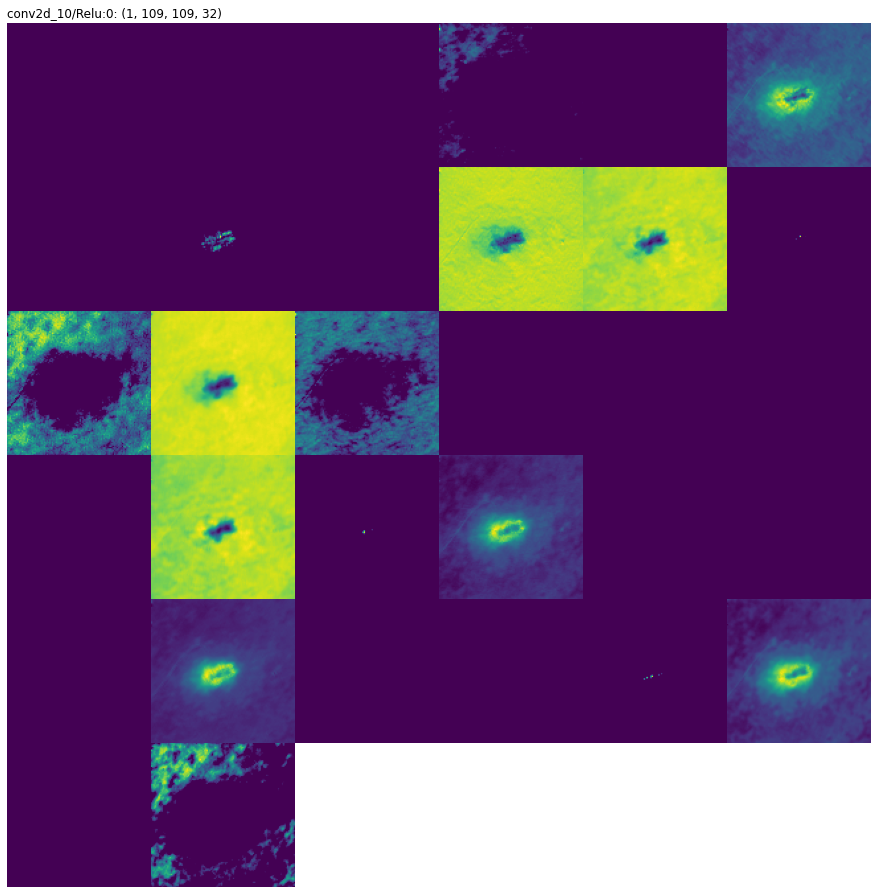

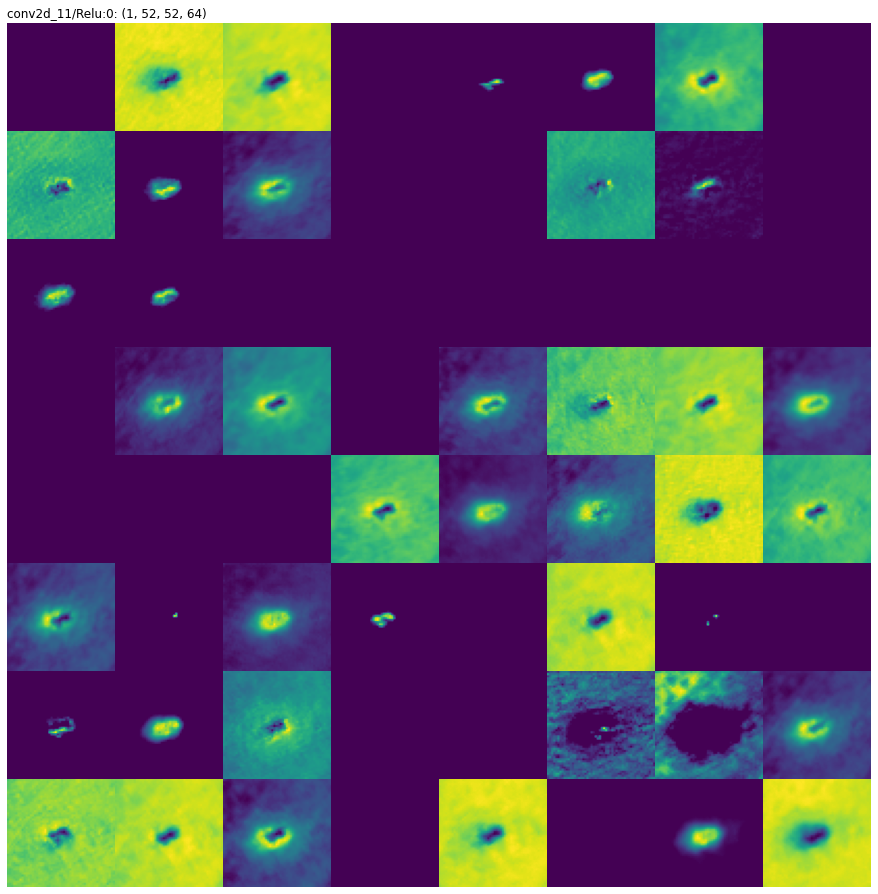

In [8]:
# plot features within features
plot_filters(weighted, [0,2,4], benign)

### Transfer Model

In [9]:
for idx, layer in enumerate(transfer.layers):
    print('Layer {:2}: name= {:15} in= {} out= {}'.format(idx, layer.name, layer.input.shape, layer.output.shape))

Layer  0: name= input_6         in= (None, 224, 224, 3) out= (None, 224, 224, 3)
Layer  1: name= block1_conv1    in= (None, 224, 224, 3) out= (None, 224, 224, 64)
Layer  2: name= block1_conv2    in= (None, 224, 224, 64) out= (None, 224, 224, 64)
Layer  3: name= block1_pool     in= (None, 224, 224, 64) out= (None, 112, 112, 64)
Layer  4: name= block2_conv1    in= (None, 112, 112, 64) out= (None, 112, 112, 128)
Layer  5: name= block2_conv2    in= (None, 112, 112, 128) out= (None, 112, 112, 128)
Layer  6: name= block2_pool     in= (None, 112, 112, 128) out= (None, 56, 56, 128)
Layer  7: name= block3_conv1    in= (None, 56, 56, 128) out= (None, 56, 56, 256)
Layer  8: name= block3_conv2    in= (None, 56, 56, 256) out= (None, 56, 56, 256)
Layer  9: name= block3_conv3    in= (None, 56, 56, 256) out= (None, 56, 56, 256)
Layer 10: name= block3_pool     in= (None, 56, 56, 256) out= (None, 28, 28, 256)
Layer 11: name= block4_conv1    in= (None, 28, 28, 256) out= (None, 28, 28, 512)
Layer 12: name

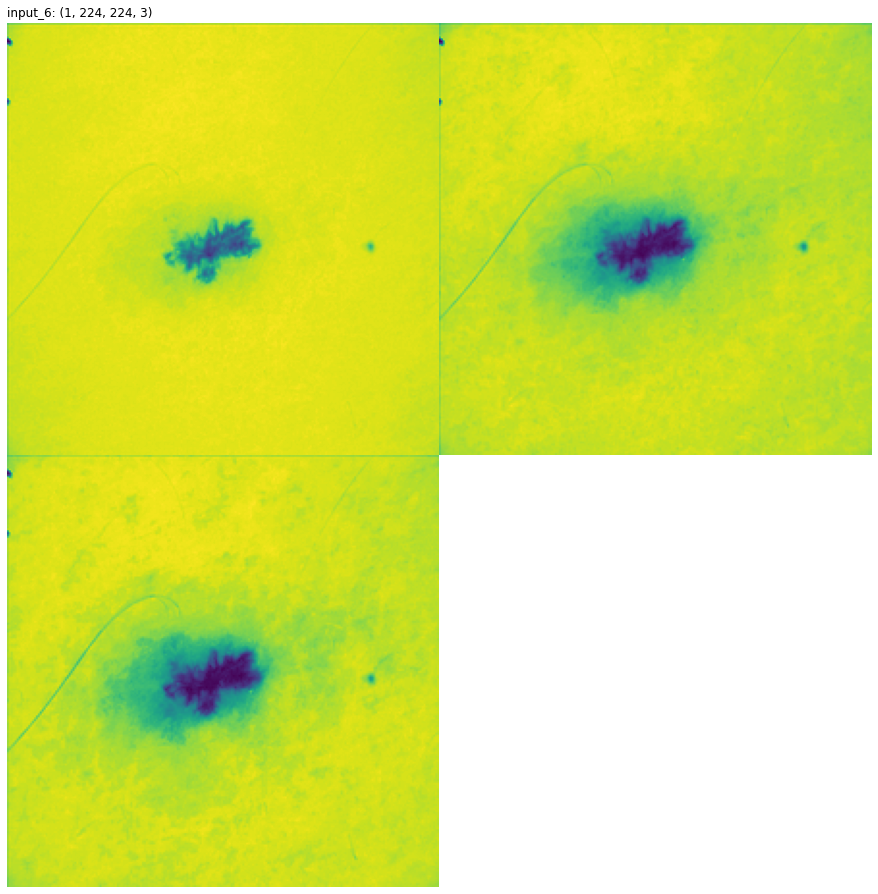

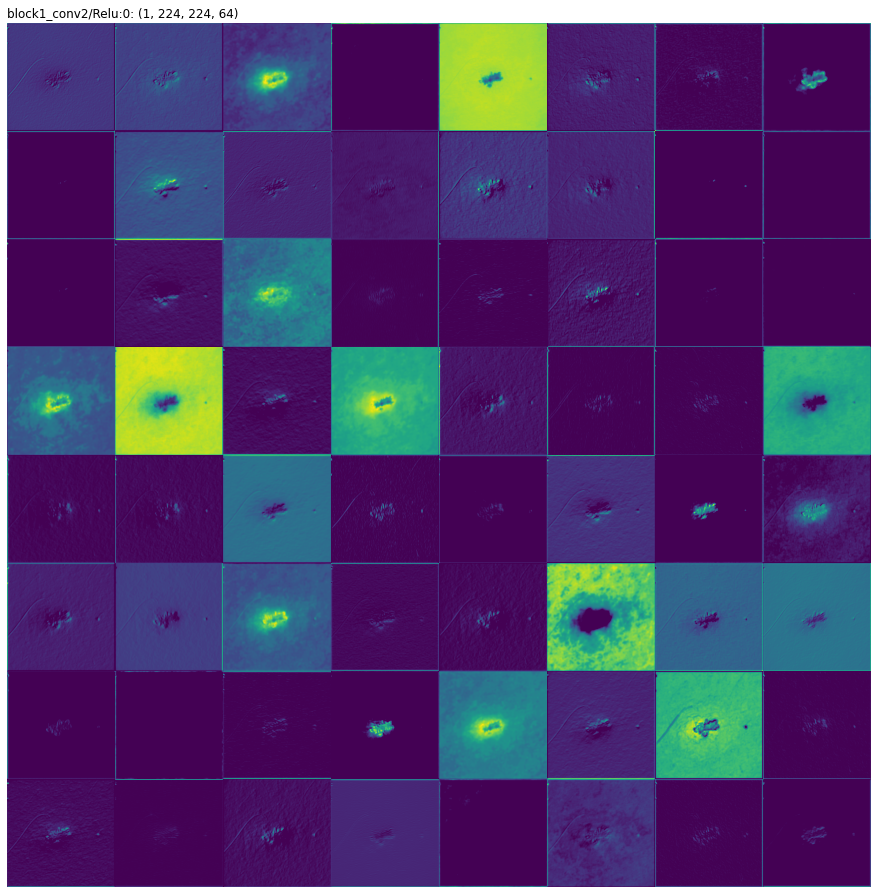

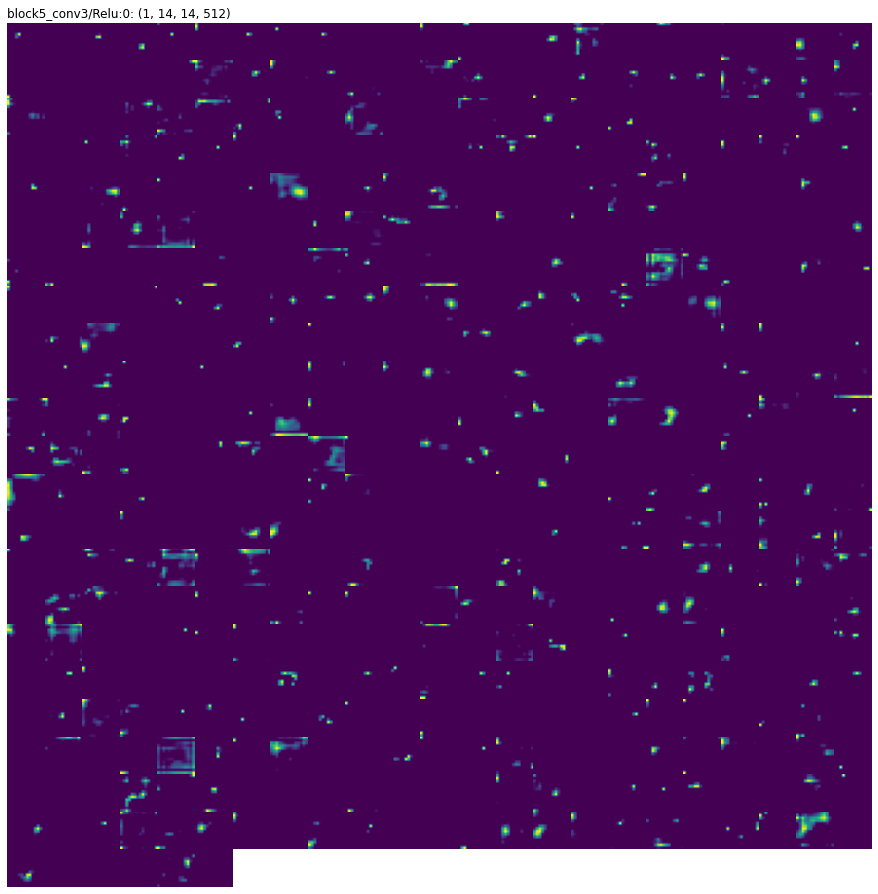

In [11]:
# plot features within features
plot_filters(transfer, [0,2,17], benign)

## Evaluate Model Predictions

### Benign Image

In [52]:
predictions = []
# run predictions
predictions.append(baseline.predict(np.reshape(benign,(1,224,224,3))/255))
predictions.append(weighted.predict(np.reshape(benign,(1,224,224,3))/255))
predictions.append(transfer.predict(np.reshape(benign,(1,224,224,3))/255))

In [60]:
print('Models prediction as malignant:\n\tBaseline: {}%\n\tWeighted: {}%\n\tTransfer: {}% '
      .format(predictions[0],predictions[1],predictions[2]))

Models prediction as malignant:
	Baseline: [[0.39492366]]%
	Weighted: [[0.45854002]]%
	Transfer: [[0.30900288]]% 


### Malignant Image

In [61]:
predictions = []
# run predictions
predictions.append(baseline.predict(np.reshape(malignant,(1,224,224,3))/255))
predictions.append(weighted.predict(np.reshape(malignant,(1,224,224,3))/255))
predictions.append(transfer.predict(np.reshape(malignant,(1,224,224,3))/255))

In [62]:
print('Models prediction as malignant:\n\tBaseline: {}%\n\tWeighted: {}%\n\tTransfer: {}% '
      .format(predictions[0],predictions[1],predictions[2]))

Models prediction as malignant:
	Baseline: [[0.9597853]]%
	Weighted: [[0.9711791]]%
	Transfer: [[1.]]% 


## More images (USB device)

In [24]:
# List avaialable bakends
print('Available Backends: ',[cv2.videoio_registry.getBackendName(b) for b in cv2.videoio_registry.getBackends()])
# List compatible backends with Videocapture
print('Compatible Backends: ',[cv2.videoio_registry.getBackendName(b) for b in cv2.videoio_registry.getCameraBackends()])

Available Backends:  ['FFMPEG', 'GSTREAMER', 'INTEL_MFX', 'MSMF', 'V4L2', 'CV_IMAGES', 'CV_MJPEG', 'UEYE']
Compatible Backends:  ['GSTREAMER', 'MSMF', 'V4L2', 'UEYE']


In [52]:
import cv2

deviceId = "/dev/video2"
filename = 'test.jpg'

# videoCaptureApi = cv2.CAP_ANY       # autodetect default API
# videoCaptureApi = cv2.CAP_FFMPEG
# videoCaptureApi = cv2.CAP_GSTREAMER 
videoCaptureApi = cv2.CAP_V4L2
cap = cv2.VideoCapture("/dev/video2", videoCaptureApi)

cap = cv2.VideoCapture(deviceId)
cap.open(deviceId)
print('Press (q) to quit or (p) to take picture.')
if not cap.isOpened():
    raise RuntimeError("ERROR! Unable to open camera")

try:
    while True:
        ret, frame = cap.read()
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('p'):
            print('Save image {}...'.format(filename))
            cv2.imwrite(filename, frame)
        elif cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:        
    cap.release()
    cv2.destroyAllWindows()

Press (q) to quit or (p) to take picture.
Save image test.jpg...
